In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from astropy.table import Table

In [2]:
euclidean = Table.read('/tmp/nnpz_compare/r_shift9/n_kdtree_3e3b49ed617d70d9cae119aaf2a04a63.fits')
target_obj = euclidean[874]
dist = 1 / target_obj['NeighborWeights']

<IPython.core.display.Javascript object>


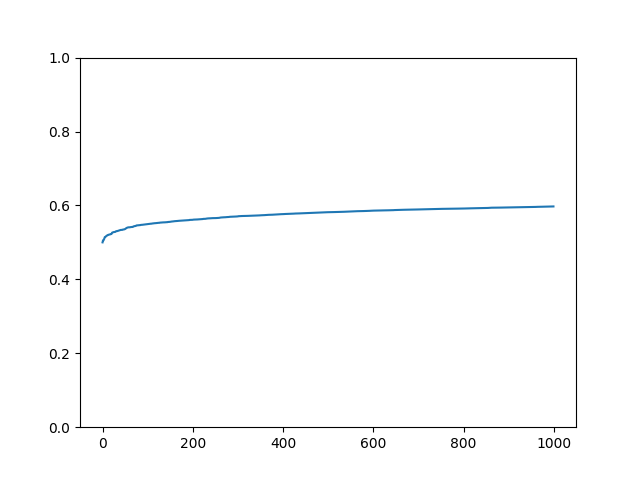

(0, 1)

In [19]:
plt.figure()
plt.plot(np.arange(1000), np.sort(dist))
plt.ylim(0, 1)

<IPython.core.display.Javascript object>


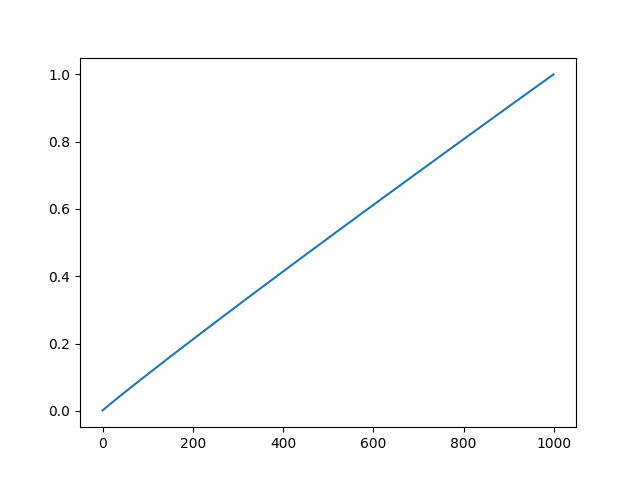

In [4]:
plt.figure()
plt.plot(np.arange(1000), np.cumsum(
    np.flip(np.sort(target_obj['NeighborWeights']), axis=0) / np.sum(target_obj['NeighborWeights'])
))

<IPython.core.display.Javascript object>


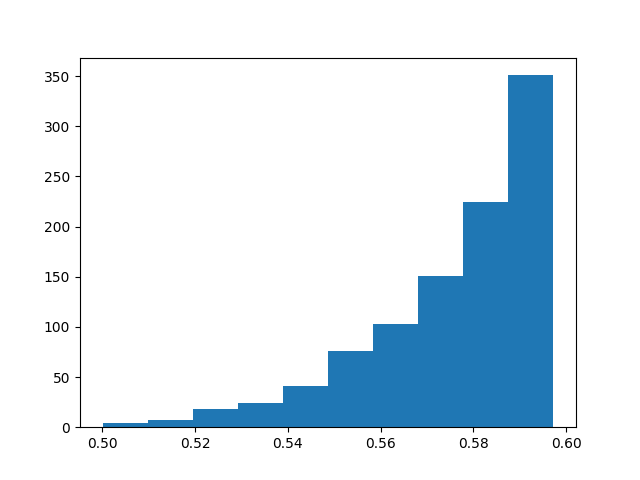

In [5]:
plt.figure()
_ = plt.hist(dist)

<IPython.core.display.Javascript object>


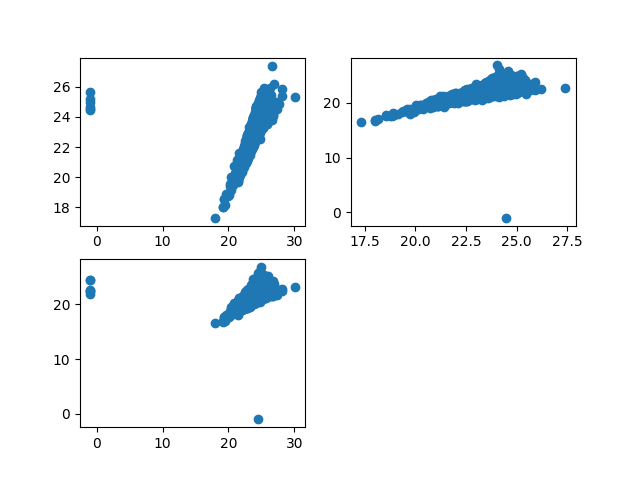

In [6]:
plt.figure()
plt.subplot(2, 2, 1)
plt.scatter(euclidean['g_obs_mag'], euclidean['r_obs_mag'])
plt.subplot(2, 2, 2)
plt.scatter(euclidean['r_obs_mag'], euclidean['Y_obs_mag'])
plt.subplot(2, 2, 3)
plt.scatter(euclidean['g_obs_mag'], euclidean['Y_obs_mag'])

In [7]:
reference = Table.read('/tmp/nnpz_compare/photometry_8b6c4039f17794ee5b63d26f92624919.fits')

In [8]:
def plot_scatter(target, reference, x, y):
    plt.scatter(reference[x], reference[y])
    plt.scatter(target[x+'_obs'], target[y+'_obs'])
    plt.xlabel(x)
    plt.ylabel(y)

In [9]:
def get_neighbors_and_weights(target, reference_catalog):
    types=list(map(lambda d: d[1], reference.dtype.descr))
    neighbors = Table(None, names=tuple(reference.colnames), dtype=tuple(types))
    neighbors_w = []
    for n, w in zip(target['NeighborIDs'], target['NeighborWeights']):
        neighbors.add_row(reference[reference['ID'] == n][0])
        neighbors_w.append(w)
    return neighbors, neighbors_w

In [10]:
neighbors, neighbors_w = get_neighbors_and_weights(target_obj, reference)

In [20]:
def plot_neighbours_plane(target, neighbors, neighbors_w, x, y, color_map):
    colors = neighbors_w
    
    if type(x) == tuple:
        nx, tx = x
    else:
        nx, tx = x, x
    
    if type(y) == tuple:
        ny, ty = y
    else:
        ny, ty = y, y
    
    scatter = plt.scatter(neighbors[nx], neighbors[ny], c=colors, cmap=color_map)
    plt.scatter([target[f'{tx}_obs']], [target[f'{ty}_obs']], color='r')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.colorbar(scatter)

<IPython.core.display.Javascript object>


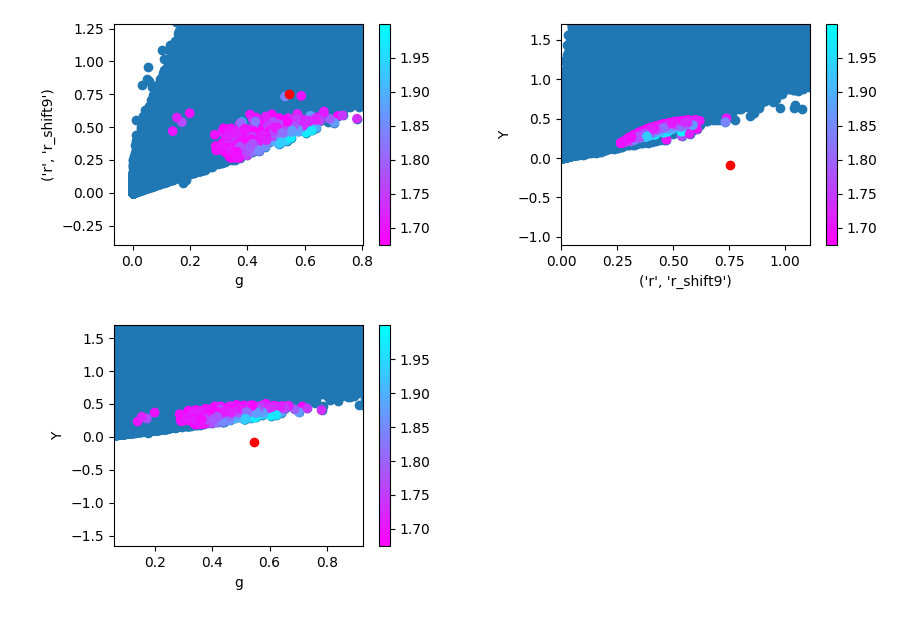

In [21]:
color_map = plt.get_cmap('cool_r')
plt.figure()
plt.subplot(2, 2, 1)
plt.scatter(reference['g'], reference['r'])
plot_neighbours_plane(target_obj, neighbors, neighbors_w, 'g', ('r', 'r_shift9'), color_map)
plt.subplot(2, 2, 2)
plt.scatter(reference['r'], reference['Y'])
plot_neighbours_plane(target_obj, neighbors, neighbors_w, ('r', 'r_shift9'), 'Y', color_map)
plt.subplot(2, 2, 3)
plt.scatter(reference['g'], reference['Y'])
plot_neighbours_plane(target_obj, neighbors, neighbors_w, 'g', 'Y', color_map)
plt.tight_layout()

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

<IPython.core.display.Javascript object>


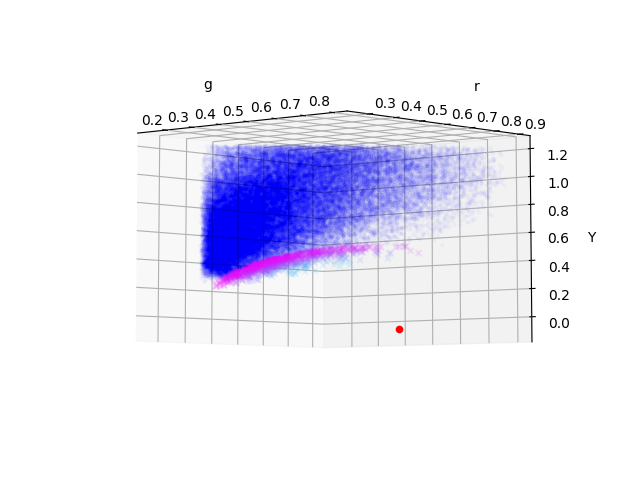

Text(0.5,0,'Y')

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

print()

ref_subset = reference[(
    (reference['Y'] < 1.2) & (reference['Y'] > 0.) &
    (reference['Y'] < 1.2) & (reference['Y'] > 0.) &
    (reference['g'] > 0.25) & (reference['g'] < 0.8) &
    (reference['r'] > 0.30) & (reference['r'] < 0.9)
)]
ax.scatter(ref_subset['g'], ref_subset['r'], ref_subset['Y'], color='b', alpha=0.02, marker='.')

ax.scatter(neighbors['g'], neighbors['r'], neighbors['Y'], c=neighbors_w, cmap=color_map, alpha=0.1, marker='x')
ax.scatter([target_obj['g_obs']], [target_obj['r_shift9_obs']], [target_obj['Y_obs']], color='r', alpha=1., marker='o')

ax.set_xlabel('g')
ax.set_ylabel('r')
ax.set_zlabel('Y')